In [1]:
# 2_4_12

In [ ]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
iris_data_train = pd.read_csv("https://stepik.org/media/attachments/course/4852/train_iris.csv")

In [23]:
iris_data_train.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2


In [24]:
iris_data_train.isnull().sum()

Unnamed: 0      0
sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [25]:
iris_data_test = pd.read_csv("https://stepik.org/media/attachments/course/4852/test_iris.csv")

In [26]:
iris_data_test.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,114,5.8,2.8,5.1,2.4,2
1,70,5.9,3.2,4.8,1.8,1
2,138,6.0,3.0,4.8,1.8,2
3,59,5.2,2.7,3.9,1.4,1
4,44,5.1,3.8,1.9,0.4,0


In [27]:
iris_data_test.isnull().sum()

Unnamed: 0      0
sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [28]:
X_train = iris_data_train.drop(["Unnamed: 0", "species"], axis=1)

In [29]:
X_train.head()

,sepal length,sepal width,petal length,petal width
0,7.4,2.8,6.1,1.9
1,5.0,3.4,1.5,0.2
2,4.8,3.4,1.6,0.2
3,5.8,2.7,5.1,1.9
4,7.2,3.6,6.1,2.5


In [30]:
X_test = iris_data_test.drop(["Unnamed: 0", "species"], axis=1)

In [31]:
X_test.head()

,sepal length,sepal width,petal length,petal width
0,5.8,2.8,5.1,2.4
1,5.9,3.2,4.8,1.8
2,6.0,3.0,4.8,1.8
3,5.2,2.7,3.9,1.4
4,5.1,3.8,1.9,0.4


In [32]:
y_train = iris_data_train.species

In [33]:
y_train.head()

0    2
1    0
2    0
3    2
4    2
Name: species, dtype: int64

In [34]:
y_test = iris_data_test.species

In [35]:
y_test.head()

0    2
1    1
2    2
3    1
4    0
Name: species, dtype: int64

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
max_depth_values = range(1, 100)

In [43]:
scores_data = pd.DataFrame()

In [44]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=0)
    clf.fit(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    train_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score],
                                   'test_score': [test_score]})
    scores_data = pd.concat([scores_data, temp_score_data])

In [45]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.95,0.94
0,3,0.96,0.94
0,4,0.96,0.92
0,5,0.96,0.92


In [46]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], 
                           value_vars=['train_score', 'test_score'],
                          var_name='set-type', value_name='score')

In [47]:
scores_data_long.head()

,max_depth,set-type,score
0,1,train_score,0.70
1,2,train_score,0.95
2,3,train_score,0.96
3,4,train_score,0.96
4,5,train_score,0.96


<AxesSubplot: xlabel='max_depth', ylabel='score'>

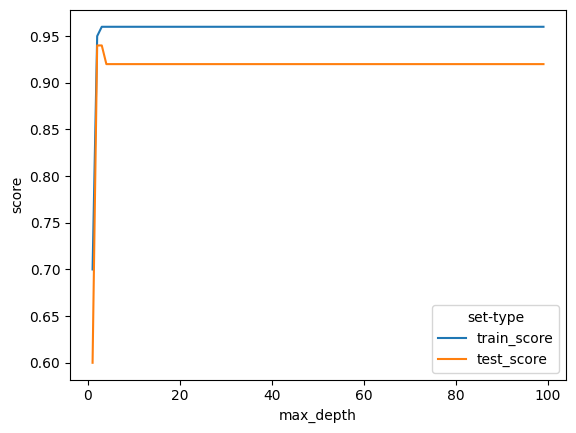

In [48]:
sns.lineplot(data=scores_data_long, x='max_depth', y='score', hue='set-type')

In [ ]:
#2_4_15

In [49]:
df_train = pd.read_csv("https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv")

In [50]:
df_train.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [51]:
df_train.isnull().sum()

Длина                 0
Высота                0
Шерстист              0
Гавкает               0
Лазает по деревьям    0
Вид                   0
dtype: int64

In [52]:
X = df_train.drop(['Вид'], axis=1)
y = df_train['Вид']

In [53]:
y.head()

0    собачка
1    собачка
2    собачка
3    собачка
4    собачка
Name: Вид, dtype: object

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [57]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [58]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [59]:
dogs_test = pd.read_json("dataset_209691_15.txt")

In [60]:
dogs_test.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,25,30.0,1,1,0
1,27,32.4,1,1,0
2,27,32.4,1,1,0
3,22,26.4,1,1,0
4,29,34.8,0,1,0


In [61]:
result = clf.predict(dogs_test)

In [63]:
pd.Series(result)[result == 'собачка'].count()

54